# Predicción de precios de alojamientos con MLP

> * [About Airbnb](#section-one)

 **1.Data Exploration and Analysis**
> * [Carga de librerías de Python](#carga-librerias)
> * [Importing neccessary Libraries](#section-two)
> * [Reading and Visualising data from the csv file](#section-three)
> * [Maps that can be used as reference for the visualisations](#section-eight)
> * [Preprocessing and preparing Data for prediction](#section-four)

**2.Model Creation and predictions**
> * [Linear Regression Model](#section-five)
> * [Gradient Boosted Regressor model](#section-six)
> * [Xgboost Regressor model](#section-seven)

<a id="section-one"></a>
**About Airbnb**

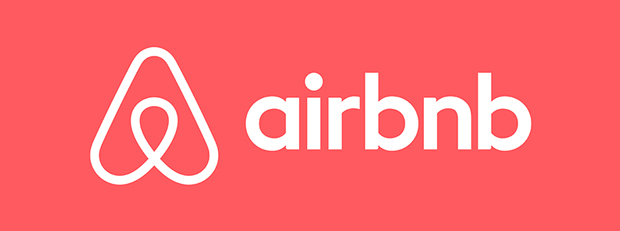

A‌i‌r‌b‌n‌b‌,‌ ‌I‌n‌c‌.‌ is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. The company does not own any of the real estate listings, nor does it host events; it acts as a broker, receiving commissions from each booking.The company is based in San Francisco, California, United States.

The company was conceived after its founders put an air mattress in their living room, effectively turning their apartment into a bed and breakfast, in order to offset the high cost of rent in San Francisco; Airbnb is a shortened version of its original name, AirBedandBreakfast.com.

Instead of copying travel sites like Expedia and Travelocity, Airbnb takes a unique approach toward lodging. Part of the “sharing economy,” Airbnb offers you someone’s home as a place to stay instead of a hotel. On Airbnb, you can find places to crash on your backpacking trip through Europe, or you can find a place to stay for a month during your internship in Los Angeles. Also, if you want to rent out extra space in your own home, you can host through Airbnb and make money for allowing a guest to stay the night.

<a id="carga-librerias"></a>
## Carga de librerías

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Gráficas
import matplotlib.pyplot as plt
import plotly as plotly
import seaborn as sns
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from folium import plugins

# Preprocesamiento
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

#%matplotlib inline

In [4]:
from plotly import __version__
import plotly.offline as py 
from plotly.offline import init_notebook_mode, plot
init_notebook_mode(connected=True)
from plotly import tools
import plotly.graph_objs as go
import plotly.express as px



<a id="section-three"></a>
**Reading and Visualising data from the csv file**

In [15]:
df = pd.read_csv('AB_NYC_2019.csv')
df.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [6]:
df1=df.sort_values(by=['number_of_reviews'],ascending=False).head(1000)

In [7]:
df2=df.sort_values(by=['price'],ascending=False).head(1000)

In [13]:
print('Rooms with the most number of reviews')
Long=-73.80
Lat=40.80
mapdf1=folium.Map([Lat,Long],zoom_start=11,tiles='Stamen Terrain')

mapdf1_rooms_map=plugins.MarkerCluster().add_to(mapdf1)

for lat,lon,label in zip(df1.latitude,df1.longitude,df1.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label).add_to(mapdf1_rooms_map)
mapdf1.add_child(mapdf1_rooms_map)

mapdf1

Rooms with the most number of reviews


In [14]:
print('Most Expensive rooms')
Long=-73.80
Lat=40.80
mapdf1=folium.Map(location=[Lat,Long],zoom_start=10,)

mapdf1_rooms_map=plugins.MarkerCluster().add_to(mapdf1)

for lat,lon,label in zip(df2.latitude,df2.longitude,df2.name):
    folium.Marker(location=[lat,lon],icon=folium.Icon(icon='home'),popup=label).add_to(mapdf1_rooms_map)
mapdf1.add_child(mapdf1_rooms_map)

mapdf1

Most Expensive rooms


<a id="section-eight"></a>
**Maps that can be used as reference for the visualisations**

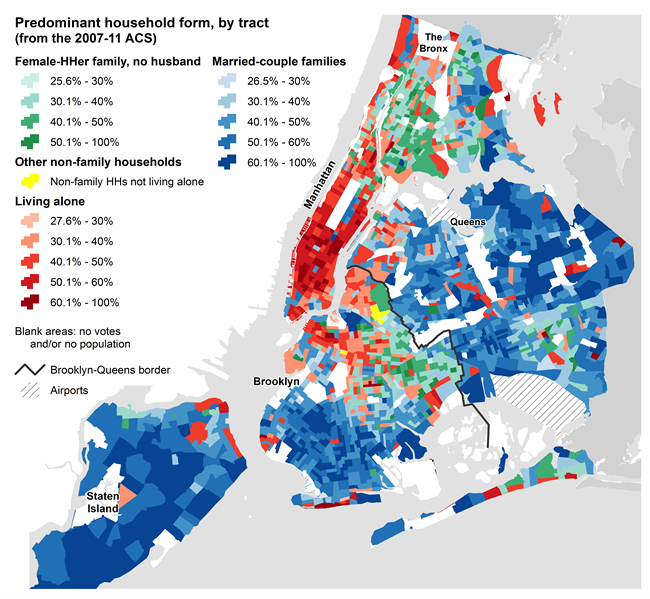

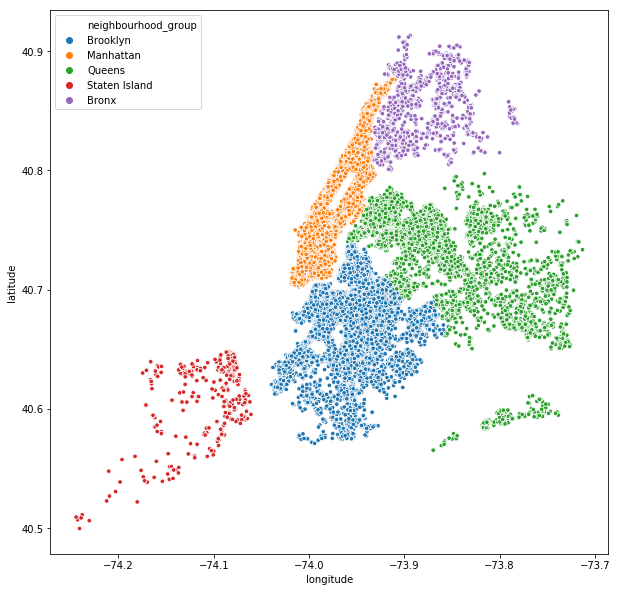

In [10]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group',s=20, data=df)
plt.show()

In [11]:
df3=df.groupby(['neighbourhood_group']).mean()

In [12]:
df3.drop(['latitude', 'longitude','host_id','id'],axis=1)

price  minimum_nights  number_of_reviews  \
neighbourhood_group                                                  
Bronx                 87.496792        4.560953          26.004583   
Brooklyn             124.383207        6.056556          24.202845   
Manhattan            196.875814        8.579151          20.985596   
Queens                99.517649        5.181433          27.700318   
Staten Island        114.812332        4.831099          30.941019   

                     reviews_per_month  calculated_host_listings_count  \
neighbourhood_group                                                      
Bronx                         1.837831                        2.233731   
Brooklyn                      1.283212                        2.284371   
Manhattan                     1.272131                       12.791330   
Queens                        1.941200                        4.060184   
Staten Island                 1.872580                        2.319035   

                     availability_365  
neighbourhood_group                    
Bronx                      165.758937  
Brooklyn                   100.232292  
Manhattan                  111.979410  
Queens                     144.451818  
Staten Island              199.678284

In [13]:
df4=df.groupby(['neighbourhood_group','neighbourhood']).mean()

In [14]:
r1=df4.loc['Bronx'].number_of_reviews.sum().round()
r2=df4.loc['Brooklyn'].number_of_reviews.sum().round()
r3=df4.loc['Manhattan'].number_of_reviews.sum().round()
r4=df4.loc['Queens'].number_of_reviews.sum().round()
r5=df4.loc['Staten Island'].number_of_reviews.sum().round()

In [15]:
abcd=df['neighbourhood_group'].value_counts()
dfabcd=pd.DataFrame(abcd)
dfabcd.reset_index(inplace=True)


In [16]:
reviews = [r1,r2,r3,r4,r5]
review = pd.DataFrame(data=reviews,index=dfabcd['index'],columns=['values'],)
review.reset_index(inplace=True)



trace10 = go.Bar(x=review['index'],y=review['values'],marker=dict(color=['Blue','Red','Green','Black','Purple']),width=0.4)

data=[trace10]
layout = go.Layout(title='Number of reviews by Neighbourhood',height=400,width=800)
fig= go.Figure(data=data,layout=layout)
py.iplot(fig)


In [17]:
r1=df4.loc['Bronx'].reviews_per_month.mean()
r2=df4.loc['Brooklyn'].reviews_per_month.mean()
r3=df4.loc['Manhattan'].reviews_per_month.mean()
r4=df4.loc['Queens'].reviews_per_month.mean()
r5=df4.loc['Staten Island'].reviews_per_month.mean()

rev = [r1,r2,r3,r4,r5]

rev_per_month = pd.DataFrame(data=rev,columns=['values'],index=dfabcd['index'])

rev_per_month.reset_index(inplace=True)


trace2 = go.Scatter(x=rev_per_month['index'],y=rev_per_month['values'],marker=dict(color=['Blue','Red','Green','Black','Purple']))
data=[trace2]
layout = go.Layout(title='Average Reviews per month per place by Neighbourhood',height=400,width=800)
fig= go.Figure(data=data,layout=layout,)
py.iplot(fig)


In [18]:
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [19]:
df5 = df.groupby(['neighbourhood_group','room_type']).mean()

In [20]:
room_types_neighbourhoods=df5.drop(['id','host_id','latitude','longitude','number_of_reviews','reviews_per_month'],axis=1)

In [21]:
room_types_neighbourhoods

price  minimum_nights  \
neighbourhood_group room_type                                     
Bronx               Entire home/apt  127.506596        5.957784   
                    Private room      66.788344        3.858896   
                    Shared room       59.800000        3.366667   
Brooklyn            Entire home/apt  178.327545        6.531332   
                    Private room      76.500099        5.539479   
                    Shared room       50.527845        7.753027   
Manhattan           Entire home/apt  249.239109       10.539283   
                    Private room     116.776622        5.446880   
                    Shared room       88.977083        6.766667   
Queens              Entire home/apt  147.050573        5.369752   
                    Private room      71.762456        5.120107   
                    Shared room       69.020202        4.232323   
Staten Island       Entire home/apt  173.846591        6.238636   
                    Private room      62.292553        3.632979   
                    Shared room       57.444444        2.333333   

                                     calculated_host_listings_count  \
neighbourhood_group room_type                                         
Bronx               Entire home/apt                        1.865435   
                    Private room                           2.338957   
                    Shared room                            3.416667   
Brooklyn            Entire home/apt                        1.837849   
                    Private room                           2.547177   
                    Shared room                            6.171913   
Manhattan           Entire home/apt                       18.922721   
                    Private room                           3.188048   
                    Shared room                            3.885417   
Queens              Entire home/apt                        1.677958   
                    Private room                           5.559905   
                    Shared room                            3.737374   
Staten Island       Entire home/apt                        1.596591   
                    Private room                           2.840426   
                    Shared room                            5.555556   

                                     availability_365  
neighbourhood_group room_type                          
Bronx               Entire home/apt        158.000000  
                    Private room           171.331288  
                    Shared room            154.216667  
Brooklyn            Entire home/apt         97.205147  
                    Private room            99.917983  
                    Shared room            178.007264  
Manhattan           Entire home/apt        117.140996  
                    Private room           101.845026  
                    Shared room            138.572917  
Queens              Entire home/apt        132.267176  
                    Private room           149.222716  
                    Shared room            192.186869  
Staten Island       Entire home/apt        178.073864  
                    Private room           226.361702  
                    Shared room             64.777778

In [22]:
fig = px.scatter_matrix(room_types_neighbourhoods,height=1000,width=900,color="minimum_nights")
fig.update_traces(diagonal_visible=False)
fig.show()

In [23]:
df6 = df.groupby(['room_type']).mean()
room_types =df6.drop(['id','host_id','latitude','longitude','number_of_reviews','reviews_per_month'],axis=1)

In [24]:
room_types

price  minimum_nights  calculated_host_listings_count  \
room_type                                                                     
Entire home/apt  211.794246        8.506907                       10.698335   
Private room      89.780973        5.377900                        3.227717   
Shared room       70.127586        6.475000                        4.662931   

                 availability_365  
room_type                          
Entire home/apt        111.920304  
Private room           111.203933  
Shared room            162.000862

In [25]:
df7 = df.groupby(['neighbourhood_group','room_type'])['id'].agg('count')

In [26]:
rmtng = pd.DataFrame(df7)

In [27]:
rmtng.reset_index(inplace=True)

In [28]:
Bronx = rmtng[rmtng['neighbourhood_group']=='Bronx']
Brooklyn = rmtng[rmtng['neighbourhood_group']=='Brooklyn']
Manhattan = rmtng[rmtng['neighbourhood_group']=='Manhattan']
Queens = rmtng[rmtng['neighbourhood_group']=='Queens']
StatenIsland = rmtng[rmtng['neighbourhood_group']=='Staten Island']

df8 = df.groupby(['room_type']).count()
rooms = df8.drop(['host_name','name','host_id','latitude','longitude','number_of_reviews','reviews_per_month','neighbourhood_group','neighbourhood','price','minimum_nights','calculated_host_listings_count','availability_365','last_review'],axis=1)
rooms.reset_index(inplace=True)


In [29]:
trace1=go.Bar(x=Bronx['room_type'],y=Bronx['id'],name='Bronx')
trace2=go.Bar(x=Brooklyn['room_type'],y=Brooklyn['id'],name='Brooklyn')
trace3=go.Bar(x=Manhattan['room_type'],y=Manhattan['id'],name='Manhattan')
trace4=go.Bar(x=Queens['room_type'],y=Queens['id'],name='Queens')
trace5=go.Bar(x=StatenIsland['room_type'],y=StatenIsland['id'],name='StatenIsland')
trace6=go.Bar(x=rooms['room_type'],y=rooms['id'],name='Total')

titles=['Room types - Bronx',
        'Room types - Brooklyn',
        'Room types - Manhattan',
        'Room types - Queens',
        'Room types - StatenIsland',
        'Room types - All Neighbourhoods']

fig=plotly.subplots.make_subplots(rows=2,cols=3,subplot_titles=titles,)
fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,1,3)
fig.append_trace(trace4,2,1)
fig.append_trace(trace5,2,2)
fig.append_trace(trace6,2,3)
fig['layout'].update(height=1000,width=1000,paper_bgcolor='white')
py.iplot(fig,filename='rmtypeplot')

In [30]:
rmtng2 = df.groupby(['neighbourhood_group','neighbourhood'])['price'].agg('mean')

In [31]:
rmtng1 = pd.DataFrame(rmtng2)


In [32]:
rmtng1.reset_index(inplace=True)

In [33]:
Bronx = rmtng1[rmtng1['neighbourhood_group']=='Bronx']
Brooklyn = rmtng1[rmtng1['neighbourhood_group']=='Brooklyn']
Manhattan = rmtng1[rmtng1['neighbourhood_group']=='Manhattan']
Queens = rmtng1[rmtng1['neighbourhood_group']=='Queens']
StatenIsland = rmtng1[rmtng1['neighbourhood_group']=='Staten Island']

In [34]:
Bronx1=Bronx.sort_values(by=['price'],ascending=False).head(10)
Brooklyn1=Brooklyn.sort_values(by=['price'],ascending=False).head(10)
Manhattan1=Manhattan.sort_values(by=['price'],ascending=False).head(10)
Queens1=Queens.sort_values(by=['price'],ascending=False).head(10)
StatenIsland1=StatenIsland.sort_values(by=['price'],ascending=False).head(10)

In [35]:
trace1=go.Scatter(x=Bronx1['neighbourhood'],y=Bronx1['price'],marker=dict(color="crimson", size=12),mode="markers",name="Bronx",)

trace2=go.Scatter(x=Brooklyn1['neighbourhood'],y=Brooklyn1['price'],marker=dict(color="blue", size=12),mode="markers",name="Brooklyn",)

trace3=go.Scatter(x=Manhattan1['neighbourhood'],y=Manhattan1['price'],marker=dict(color="purple", size=12),mode="markers",name="Manhattan",)

trace4=go.Scatter(x=Queens1['neighbourhood'],y=Queens1['price'],marker=dict(color="black", size=12),mode="markers",name="Queens",)

trace5=go.Scatter(x=StatenIsland1['neighbourhood'],y=StatenIsland1['price'],marker=dict(color="red", size=12),mode="markers",name="StatenIsland",)

data = [trace1,trace2,trace3,trace4,trace5]

titles=['Most Pricey neighbourhoods-Bronx',
        'Most Pricey neighbourhoods-Brooklyn',
        'Most Pricey neighbourhoods-Manhattan',
        'Most Pricey neighbourhoods-Queens',
        'Most Pricey neighbourhoods-StatenIsland']

fig =plotly.subplots.make_subplots(rows=3,cols=2,subplot_titles=titles)


fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,2,1)
fig.append_trace(trace4,2,2)
fig.append_trace(trace5,3,1)


fig['layout'].update(height=1200,width=1000,paper_bgcolor='white')

py.iplot(fig,filename='pricetypeplot')

In [36]:
pnd2 =df.groupby(['neighbourhood','neighbourhood_group']).agg('count')
pnd2.reset_index(inplace=True)
pnd2.set_index(['neighbourhood_group'],inplace=True)
pnd2.sort_index(inplace=True)
pnd2.drop(['name',
           'host_id',
           'host_name',
           'latitude','longitude',
           'room_type','price','minimum_nights',
           'number_of_reviews','last_review','reviews_per_month',
           'calculated_host_listings_count','availability_365'],
            axis=1,inplace=True)


In [37]:
Bronx = pnd2[pnd2.index=='Bronx']
Brooklyn = pnd2[pnd2.index=='Brooklyn']
Manhattan = pnd2[pnd2.index=='Manhattan']
Queens = pnd2[pnd2.index=='Queens']
StatenIsland = pnd2[pnd2.index=='Staten Island']

In [38]:
Bronx2=Bronx.sort_values(by='id',ascending=False).head(10)
Brooklyn2=Brooklyn.sort_values(by='id',ascending=False).head(10)
Manhattan2=Manhattan.sort_values(by='id',ascending=False).head(10)
Queens2=Queens.sort_values(by='id',ascending=False).head(10)
StatenIsland2=StatenIsland.sort_values(by='id',ascending=False).head(10)

In [39]:
trace1=go.Pie(labels=Bronx2['neighbourhood'], values=Bronx2['id'], name="Bronx Neighbourhoods",showlegend=False)
trace2=go.Pie(labels=Brooklyn2['neighbourhood'], values=Brooklyn2['id'], name="Brooklyn Neighbourhoods",showlegend=False)
trace3=go.Pie(labels=Manhattan2['neighbourhood'], values=Manhattan2['id'], name="Manhattan Neighbourhoods",showlegend=False)
trace4=go.Pie(labels=Queens2['neighbourhood'], values=Queens2['id'], name="Queens Neighbourhoods",showlegend=False)
trace5=go.Pie(labels=StatenIsland2['neighbourhood'], values=StatenIsland2['id'], name="StatenIsland Neighbourhoods",showlegend=False)


titles=['Popular neighbourhoods-Bronx',
        'Popular neighbourhoods-Brooklyn',
        'Popular neighbourhoods-Manhattan',
        'Popular neighbourhoods-Queens',
        'Popular neighbourhoods-StatenIsland']



fig =plotly.subplots.make_subplots(rows=3,cols=2,subplot_titles=titles,specs=[[{"type": "domain"}, {"type": "domain"}],
                                                                             [{"type": "domain"}, {"type": "domain"}],
                                                                             [{"type": "domain"}, {"type": "domain"}]])
                                                                     

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,2)
fig.append_trace(trace3,2,1)
fig.append_trace(trace4,2,2)
fig.append_trace(trace5,3,1)


fig['layout'].update(height=1000,width=800,paper_bgcolor='white')

py.iplot(fig,filename='pricetypeplot')

<a id="section-four"></a>
**Preprocessing and preparing Data for prediction**

In [17]:
df = pd.read_csv('AB_NYC_2019.csv')
df1 = df

df1.drop(['name','id','host_name','last_review'],axis=1,inplace=True)
df1['reviews_per_month']=df1['reviews_per_month'].replace(np.nan, 0)

le = preprocessing.LabelEncoder()
le.fit(df1['neighbourhood_group'])    
df1['neighbourhood_group']=le.transform(df1['neighbourhood_group'])

le = preprocessing.LabelEncoder()
le.fit(df1['neighbourhood'])
df1['neighbourhood']=le.transform(df1['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(df1['room_type'])
df1['room_type']=le.transform(df1['room_type'])

df1.sort_values(by='price',ascending=True,inplace=True)

df1.head()

host_id  neighbourhood_group  neighbourhood  latitude  longitude  \
25796   86327101                    1             13  40.68258  -73.91284   
25634   15787004                    1             28  40.69467  -73.92433   
25433  131697576                    0             62  40.83296  -73.88668   
25753    1641537                    1             91  40.72462  -73.94072   
23161    8993084                    1             13  40.69023  -73.95428   

       room_type  price  minimum_nights  number_of_reviews  reviews_per_month  \
25796          1      0               1                 95               4.35   
25634          1      0               2                 16               0.71   
25433          1      0               2                 55               2.56   
25753          1      0               2                 12               0.53   
23161          1      0               4                  1               0.05   

       calculated_host_listings_count  availability_365  
25796                               6               222  
25634                               5                 0  
25433                               4               127  
25753                               2                 0  
23161                               4                28

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression

<a id="section-five"></a>
**Linear Regression Model**

In [19]:
lm = LinearRegression()

In [20]:
X = df1[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']]
y = df1['price']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [22]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
predicts = lm.predict(X_test)

In [24]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [25]:
print("Root mean squared error is:")
np.sqrt(metrics.mean_squared_error(y_test,predicts))

Root mean squared error is:


180.73409656936218

In [26]:
print('r2 score is:')
r2 = r2_score(y_test,predicts)
r2*100

r2 score is:


11.63957678232398

In [27]:
print("Mean absolute error is:")
mean_absolute_error(y_test,predicts)

Mean absolute error is:


72.86091366825202

In [28]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predicts.flatten()})
error_diff1 = error_diff.head(20)

In [29]:
error_diff1.head(5)

Actual Values  Predicted Values
0            400        135.112125
1            140        210.599057
2            195        176.222978
3            120        100.439183
4             88         88.545753

Actual values vs Predicted values

In [30]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff1['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff1['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

Linear Model Predictions

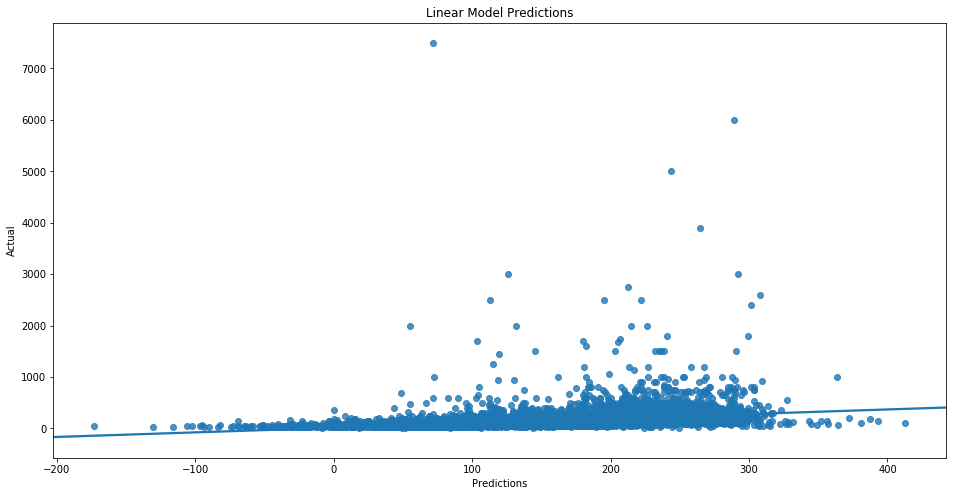

In [31]:
plt.figure(figsize=(16,8))
sns.regplot(predicts,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.show()

## Modelo de redes neuronales

In [36]:
X_train.head()

host_id  neighbourhood_group  neighbourhood  latitude  longitude  \
19649  101653570                    1             13  40.68955  -73.95117   
29617     510931                    2             73  40.70402  -74.01572   
33754   45093051                    2             94  40.80045  -73.95166   
14418   59066199                    2            201  40.77511  -73.95276   
40718   47038126                    2            202  40.78590  -73.97230   

       room_type  minimum_nights  number_of_reviews  reviews_per_month  \
19649          1               2                195               6.01   
29617          1               2                 11               0.66   
33754          1               1                 13               1.13   
14418          0              10                  5               0.12   
40718          0               3                  2               0.45   

       calculated_host_listings_count  availability_365  
19649                               3                40  
29617                               2                58  
33754                               2               351  
14418                               1                88  
40718                               2                40

In [46]:
X_train.shape

(39116, 11)

In [42]:
y_train.head()

19649     59
29617    120
33754    100
14418    125
40718    300
Name: price, dtype: int64

In [43]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [47]:
# Definición del modelo
model = Sequential()
model.add(Dense(7, input_dim=11, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compilar el modelo 
# mean_squared_error
# binary_crossentropy
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 7)                 84        
_________________________________________________________________
dense_8 (Dense)              (None, 5)                 40        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 6         
Total params: 130
Trainable params: 130
Non-trainable params: 0
_________________________________________________________________


In [48]:
# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
39116/39116 [==============================] - 3s 66us/step - loss: 82225222996.1977
Epoch 2/100
39116/39116 [==============================] - 2s 52us/step - loss: 76532.4571
Epoch 3/100
39116/39116 [==============================] - 2s 51us/step - loss: 77087.5601
Epoch 4/100
39116/39116 [==============================] - 2s 49us/step - loss: 78404.0517
Epoch 5/100
39116/39116 [==============================] - 2s 54us/step - loss: 83225.2403
Epoch 6/100
39116/39116 [==============================] - 2s 52us/step - loss: 103584.0944
Epoch 7/100
39116/39116 [==============================] - 2s 54us/step - loss: 8980084.8695
Epoch 8/100
39116/39116 [==============================] - 2s 52us/step - loss: 26430182.9516
Epoch 9/100
39116/39116 [==============================] - 2s 50us/step - loss: 82153175.0284
Epoch 10/100
39116/39116 [==============================] - 2s 54us/step - loss: 42870415.1755
Epoch 11/100
39116/3911

39116/39116 [==============================] - 2s 47us/step - loss: 62845.8332
Epoch 87/100
39116/39116 [==============================] - 2s 58us/step - loss: 62845.0051
Epoch 88/100
39116/39116 [==============================] - 2s 54us/step - loss: 62846.0768
Epoch 89/100
39116/39116 [==============================] - 2s 56us/step - loss: 62844.5869
Epoch 90/100
39116/39116 [==============================] - 2s 52us/step - loss: 62845.6665
Epoch 91/100
39116/39116 [==============================] - 2s 59us/step - loss: 62845.5020
Epoch 92/100
39116/39116 [==============================] - 3s 73us/step - loss: 62845.6448
Epoch 93/100
39116/39116 [==============================] - 2s 52us/step - loss: 62845.6024
Epoch 94/100
39116/39116 [==============================] - 2s 57us/step - loss: 62845.5797
Epoch 95/100
39116/39116 [==============================] - 3s 73us/step - loss: 62845.0087
Epoch 96/100
39116/39116 [==============================] - 2s 55us/step - loss: 62845.3649
E

In [49]:
predicts = model.predict(X_test)

In [24]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [51]:
print("Root mean squared error is:")
np.sqrt(metrics.mean_squared_error(y_test,predicts))

Root mean squared error is:


192.32425917448336

In [52]:
print('r2 score is:')
r2 = r2_score(y_test,predicts)
r2*100

r2 score is:


-0.056599438164739446

In [53]:
print("Mean absolute error is:")
mean_absolute_error(y_test,predicts)

Mean absolute error is:


89.40778261499301

In [54]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': predicts.flatten()})
error_diff1 = error_diff.head(20)

In [55]:
error_diff1.head(5)

Actual Values  Predicted Values
0            400        153.612305
1            140        153.612305
2            195        153.612305
3            120        153.612305
4             88        153.612305

Actual values vs Predicted values

In [56]:
title=['Pred vs Actual']
fig = go.Figure(data=[
    go.Bar(name='Predicted', x=error_diff1.index, y=error_diff1['Predicted Values']),
    go.Bar(name='Actual', x=error_diff1.index, y=error_diff1['Actual Values'])
])

fig.update_layout(barmode='group')
fig.show()

Linear Model Predictions

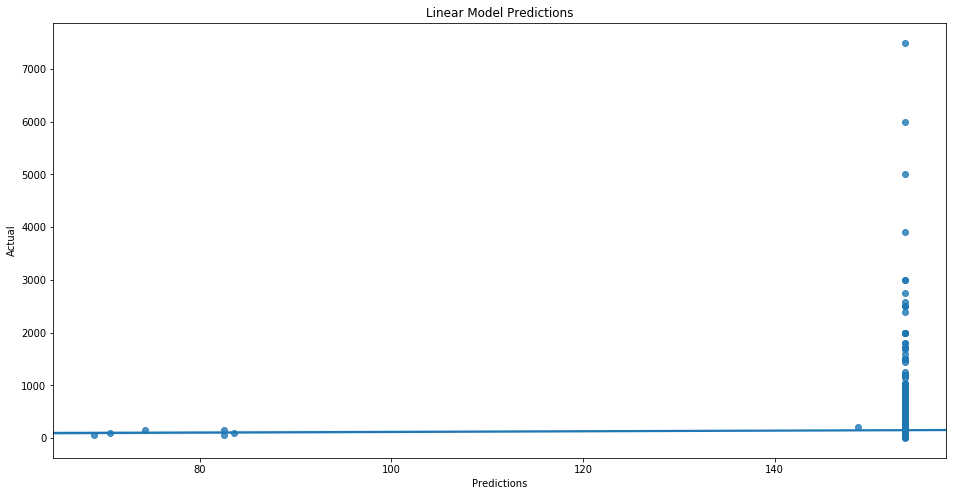

In [57]:
plt.figure(figsize=(16,8))
sns.regplot(predicts,y_test)
plt.xlabel('Predictions')
plt.ylabel('Actual')
plt.title("Linear Model Predictions")
plt.show()